# Análise preliminar dos dados brutos do IRFCL

In [1]:
import pandas as pd 
irfcl = pd.read_csv('IRFCL.csv')

### Quais colunas nós temos?

In [2]:
irfcl.columns

Index(['COUNTRY', 'INDICATOR', 'SECTOR', 'FREQUENCY', 'TIME_PERIOD', 'value',
       'index'],
      dtype='object')

### Quais são os tipode de dados de cada coluna?

In [3]:
display(irfcl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107805 entries, 0 to 107804
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   COUNTRY      107805 non-null  object 
 1   INDICATOR    107805 non-null  object 
 2   SECTOR       107805 non-null  object 
 3   FREQUENCY    107805 non-null  object 
 4   TIME_PERIOD  107805 non-null  object 
 5   value        107805 non-null  float64
 6   index        0 non-null       float64
dtypes: float64(2), object(5)
memory usage: 5.8+ MB


None

Objetos do tipo object indicam que eles podem ser de qualquer tipo, isso não é bom. É necessário ser tratado da bronze para a silver!

### Qual o shape da nossa tabela (linhas x colunas)?

In [4]:
irfcl.shape

(107805, 7)

*Resumo Inicial*:

É uma tabela que possui 107.805 linhas e 7 colunas, sendo elas:
1. 'COUNTRY'
2. 'INDICATOR'
3. 'SECTOR'
4. 'FREQUENCY'
5. 'TIME_PERIOD'
6. 'value',
7. 'index'

- Além disso, podemos ver que a coluna 'index' todos os itens são nulos e sobre os tipos de dados,

    - Todas as colunas são do tipo object exceto 'value' e 'index' que são do tipo float


## Análise descritiva dos dados

- O método describe originalmente faz a análise apenas das colunas numéricas:

In [5]:
irfcl.describe()

,value,index
count,1.078050e+05,0.0
mean,3.049472e+10,NaN
std,1.631177e+11,NaN
min,-5.527280e+11,NaN
25%,-1.703486e+08,NaN
50%,0.000000e+00,NaN
75%,7.398400e+09,NaN
max,3.959505e+12,NaN


- Aqui teremos uma análise descritiva das colunas que não são numéricas

In [6]:
irfcl.describe(exclude='number')

,COUNTRY,INDICATOR,SECTOR,FREQUENCY,TIME_PERIOD
count,107805,107805,107805,107805,107805
unique,45,24,3,1,102
top,BEL,IRFCLDT2_USD_IRFCL13,S1XS1311,Q,2016-Q1
freq,7187,5343,83365,107805,1201


### Análise do describe

Aqui podemos decobrir algumas informações importantes:

- Estamos com dados de 45 países
- Tem 24 indicadores diferentes sendo analisados ao todo
- Estamos com dados de frequência trimestral

- Não podemos chegar em nenhuma conclusão sobre os valores numéricos, pois como temos 24 indicadores, os valores variam muito de acordo com o indicador


# O que mais podemos descobrir?

1. Quais são esses países?
2. Quais são esses 24 indicadores?
3. Todos os países tem os 24 indicadores com valores não nulos?
4. Qual o menor período e qual o maior? Qual é o intervalo (período) que estamos analisando?
5. Como fica o gráfico da comparação dos países com cada indicador?

#### 1. Quais são os países?

In [7]:
irfcl.COUNTRY.unique()

array(['USA', 'CHN', 'DEU', 'JPN', 'GBR', 'FRA', 'ITA', 'IND', 'CAN',
       'AUS', 'KOR', 'ESP', 'NLD', 'IRL', 'CHE', 'LUX', 'SWE', 'DNK',
       'FIN', 'POL', 'BEL', 'CZE', 'HUN', 'ROU', 'PRT', 'GRC', 'BRA',
       'MEX', 'ARG', 'COL', 'CHL', 'PER', 'URY', 'SGP', 'HKG', 'THA',
       'MYS', 'IDN', 'PHL', 'SAU', 'ISR', 'NOR', 'RUS', 'ZAF', 'EGY'],
      dtype=object)

#### 2. Quais são os indicadores?

In [8]:
irfcl.INDICATOR.unique()

array(['IRFCLDT1_IRFCL65_USD_IRFCL13', 'IRFCLDT1_IRFCL54_USD_IRFCL13',
       'IRFCLDT1_IRFCL56_USD_IRFCL13', 'IRFCLDT1_IRFCL57_USD_IRFCL13',
       'IRFCLDT1_IRFCL65_DIC_XDR_USD_IRFCL13',
       'IRFCLDT1_IRFCL32_USD_IRFCL13', 'IRFCLDT1_IRFCLCDCFC_USD_IRFCL13',
       'IRFCLDT2_USD_IRFCL13', 'IRFCLDT2_IRFCL24_SUTM_USD_IRFCL13',
       'IRFCLDT2_IRFCL24_SM1MUT3M_USD_IRFCL13',
       'IRFCLDT2_IRFCL24_SM3MUTY_USD_IRFCL13',
       'IRFCLDT2_IRFCL26_SUTM_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL26_SM1MUT3M_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL26_SM3MUTY_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL151_SUTM_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL151_SM1MUT3M_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL151_SM3MUTY_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL1_SUTM_IN_LP_USD_IRFCL13',
       'IRFCLDT2_IRFCL1_SUTM_SHP_USD_IRFCL13',
       'IRFCLDT4_IRFCLU97_A_USD_IRFCL13',
       'IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13',
       'IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13',
       'IRFCLDT4_IRFCL68_USD_IRFCL13', 'I

#### 3. Todos os países tem os 24 indicadores com valores não nulos?

Queremos identificar quais indicadores de cada país que tem valores nulos


In [ ]:
import numpy as np 

irfcl_null = irfcl.replace(0, np.nan) # Trocando os valores zero por nulo

pivot_nulos = irfcl_null.pivot_table(
    values='value',
    index='COUNTRY',
    columns='INDICATOR',
    aggfunc=lambda x: x.isnull().sum()
)

display(pivot_nulos)


INDICATOR,IRFCLDT1_IRFCL32_USD_IRFCL13,IRFCLDT1_IRFCL54_USD_IRFCL13,IRFCLDT1_IRFCL56_USD_IRFCL13,IRFCLDT1_IRFCL57_USD_IRFCL13,IRFCLDT1_IRFCL65_DIC_XDR_USD_IRFCL13,IRFCLDT1_IRFCL65_USD_IRFCL13,IRFCLDT1_IRFCLCDCFC_USD_IRFCL13,IRFCLDT2_IRFCL151_SM1MUT3M_FO_USD_IRFCL13,IRFCLDT2_IRFCL151_SM3MUTY_FO_USD_IRFCL13,IRFCLDT2_IRFCL151_SUTM_FO_USD_IRFCL13,...,IRFCLDT2_IRFCL24_SUTM_USD_IRFCL13,IRFCLDT2_IRFCL26_SM1MUT3M_FO_USD_IRFCL13,IRFCLDT2_IRFCL26_SM3MUTY_FO_USD_IRFCL13,IRFCLDT2_IRFCL26_SUTM_FO_USD_IRFCL13,IRFCLDT2_USD_IRFCL13,IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13,IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13,IRFCLDT4_IRFCL68_USD_IRFCL13,IRFCLDT4_IRFCL69X_USD_IRFCL13,IRFCLDT4_IRFCLU97_A_USD_IRFCL13
COUNTRY,,,,,,,,,,,,,,,,,,,,,
ARG,0.0,5.0,0.0,28.0,0.0,4.0,0.0,12.0,22.0,26.0,...,0.0,10.0,20.0,1.0,0.0,0.0,0.0,6.0,0.0,10.0
AUS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,3.0,0.0,0.0,0.0
BEL,100.0,63.0,100.0,100.0,100.0,100.0,100.0,112.0,108.0,162.0,...,125.0,182.0,166.0,177.0,24.0,100.0,102.0,102.0,100.0,14.0
BRA,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,49.0,9.0,3.0,0.0,0.0,22.0,20.0,22.0,9.0
CAN,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0
CHE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,...,57.0,59.0,60.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0
CHL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,63.0
CHN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
COL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,NaN,0.0


In [38]:
teste = irfcl_null[irfcl_null['INDICATOR']== 'IRFCLDT1_IRFCL65_USD_IRFCL13']
# teste['TIME_PERIOD'] = pd.PeriodIndex(irfcl['TIME_PERIOD'], freq='Q').to_timestamp()

# display(teste['TIME_PERIOD'])
pivot_teste = teste.pivot_table(
    values='value',
    index='TIME_PERIOD',
    columns='COUNTRY',
)

display(pivot_teste)

COUNTRY,ARG,AUS,BEL,BRA,CAN,CHE,CHL,CHN,COL,CZE,...,PRT,ROU,RUS,SAU,SGP,SWE,THA,URY,USA,ZAF
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
2000-Q1,NaN,1.651310e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.267800e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-Q2,NaN,1.672967e+10,NaN,NaN,3.016000e+10,NaN,NaN,NaN,8.355377e+09,1.312300e+10,...,1.390814e+10,NaN,NaN,NaN,NaN,NaN,3.214200e+10,NaN,NaN,NaN
2000-Q3,2.489000e+10,1.585132e+10,1.191251e+10,NaN,3.069700e+10,5.195921e+10,1.415730e+10,NaN,8.595700e+09,1.255900e+10,...,1.385380e+10,NaN,NaN,NaN,7.793000e+10,1.706300e+10,3.224982e+10,NaN,NaN,1.127400e+10
2000-Q4,2.514800e+10,1.881495e+10,1.225562e+10,3.301140e+10,3.242400e+10,5.372400e+10,1.474140e+10,NaN,9.006060e+09,1.313900e+10,...,1.422651e+10,NaN,NaN,NaN,8.016960e+10,1.770600e+10,3.266126e+10,NaN,6.693000e+10,1.129700e+10
2001-Q1,2.192429e+10,1.726463e+10,1.236038e+10,3.440705e+10,3.351300e+10,4.994300e+10,1.454510e+10,NaN,9.284840e+09,1.289800e+10,...,1.386445e+10,NaN,NaN,NaN,7.752250e+10,1.684500e+10,3.229471e+10,NaN,6.371900e+10,1.111200e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-Q2,2.902180e+10,6.289157e+10,4.262410e+10,3.578269e+11,1.229000e+11,8.837831e+11,4.406306e+10,3.453853e+12,6.032764e+10,1.466234e+11,...,NaN,7.669161e+10,5.934984e+11,4.677781e+11,3.716753e+11,6.235100e+10,2.243286e+11,1.811134e+10,NaN,6.210000e+10
2024-Q3,2.717227e+10,6.513723e+10,4.277432e+10,3.720164e+11,1.280740e+11,9.503553e+11,4.562870e+10,3.571803e+12,6.300936e+10,1.545803e+11,...,NaN,8.247340e+10,6.337373e+11,4.569725e+11,3.898122e+11,6.542100e+10,2.430074e+11,1.883999e+10,NaN,6.363300e+10
2024-Q4,2.963973e+10,6.362664e+10,4.143549e+10,3.297297e+11,1.216220e+11,9.094148e+11,4.442108e+10,3.455558e+12,6.191977e+10,1.462856e+11,...,NaN,7.323297e+10,6.090680e+11,4.372184e+11,3.714332e+11,6.328600e+10,2.370458e+11,1.737374e+10,NaN,6.545900e+10


In [ ]:
pivot_teste.plot()

#### 4. Qual o menor período e qual o maior? Qual é o intervalo (período) que estamos analisando?



In [29]:
print(irfcl_null['TIME_PERIOD'].min())
print(irfcl_null['TIME_PERIOD'].max())

2000-Q1
2025-Q2


Estamos trabalhando com dados do período do primeiro trismestre de 2000 até o segundo trimestre de 2025!

#### 5. Como fica o gráfico da comparação dos países com cada indicador?

## Regras de Negócio, aqui estão os principais indicadores:

1. **Reservas oficiais (total)** — `IRFCLDT1_IRFCL65_USD_IRFCL13`

   * **Por quê:** headline do “pulmão” em FX.
   * **Leitura:** nível e tendência.
   * **Sinal:** queda rápida ou patamar baixo.

2. **Drenagens líquidas de curto prazo (total)** — `IRFCLDT2_USD_IRFCL13`

   * **Por quê:** concentra o risco de **saídas previstas** no curto prazo.
   * **Leitura:** sempre em **razão** com (1).
   * **Regra de bolso:** Reservas/Drenagens > **1,5** (conforto); 1,0–1,5 (atenção); <1 (vermelho).

3. **Drenagens ≤ 1 mês** — `IRFCLDT2_IRFCL24_SUTM_USD_IRFCL13`

   * **Por quê:** é a **parede imediata**; define estresse de curtíssimo prazo.
   * **Leitura:** comparar com “liquidez dura” (4) e (5).

4. **Liquidez mobilizável imediata – “Caixa + SDR + Tranche FMI”**

   * **Códigos:**

     * **Caixa (Moeda e Depósitos)** — `IRFCLDT1_IRFCLCDCFC_USD_IRFCL13`
     * **SDR holdings** — `IRFCLDT1_IRFCL65_DIC_XDR_USD_IRFCL13`
     * **Reserve tranche no FMI** — `IRFCLDT1_IRFCL57_USD_IRFCL13`
   * **Por quê:** o que vira **poder de fogo agora** (sem fricção relevante).
   * **Leitura:** some os três e use nas razões abaixo.
   * **Regra de bolso:** (Caixa+SDR+Tranche)/Reservas ≥ **40–50%** sugere boa composição.

5. **Títulos cedidos / em repo (imobilização)** — `IRFCLDT4_IRFCL68_USD_IRFCL13`

   * **Por quê:** ajusta reservas pelo que **não está 100% mobilizável**.
   * **Leitura:** calcule **Reservas Ajustadas = Reservas – Títulos cedidos**.


### Maiores economias:

- **Países:** `USA, CHN, DEU, JPN, GBR, FRA, ITA, IND, CAN, AUS`

In [51]:
indicadores = [
    "IRFCLDT1_IRFCL65_USD_IRFCL13: Reservas oficiais (total)",
    "IRFCLDT2_USD_IRFCL13:	Drenagens líquidas de curto prazo (total)",
    "IRFCLDT2_IRFCL24_SUTM_USD_IRFCL13: renagens líquidas de curto prazo Até 1 mês",
    "IRFCLDT1_IRFCLCDCFC_USD_IRFCL13: Moeda e Depósitos, Parte mais líquida (caixa bancário em FX).",
    "IRFCLDT1_IRFCL65_DIC_XDR_USD_IRFCL13: SDR – holdings (dentro das reservas)	Parcela de SDR que compõe as reservas (lado ativo).",
    "IRFCLDT1_IRFCL57_USD_IRFCL13: Posição de reservas no FMI	“Reserve tranche position” (acesso potencial imediato no FMI).",
    "IRFCLDT4_IRFCL68_USD_IRFCL13: 	Títulos cedidos/em repo	Reduz “o que é mobilizável” de imediato.",
]

paises = ['USA', 'CHN', 'DEU', 'JPN', 'GBR', 'FRA', 'ITA', 'IND', 'BRA', 'AUS']


/home/mateus/Documentos/Faculdade/bancos2/venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


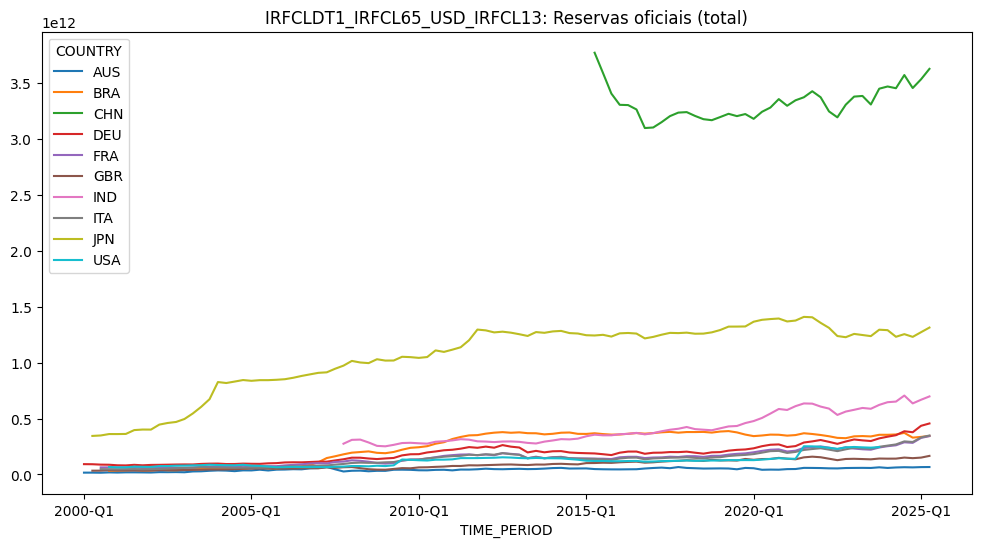

/home/mateus/Documentos/Faculdade/bancos2/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


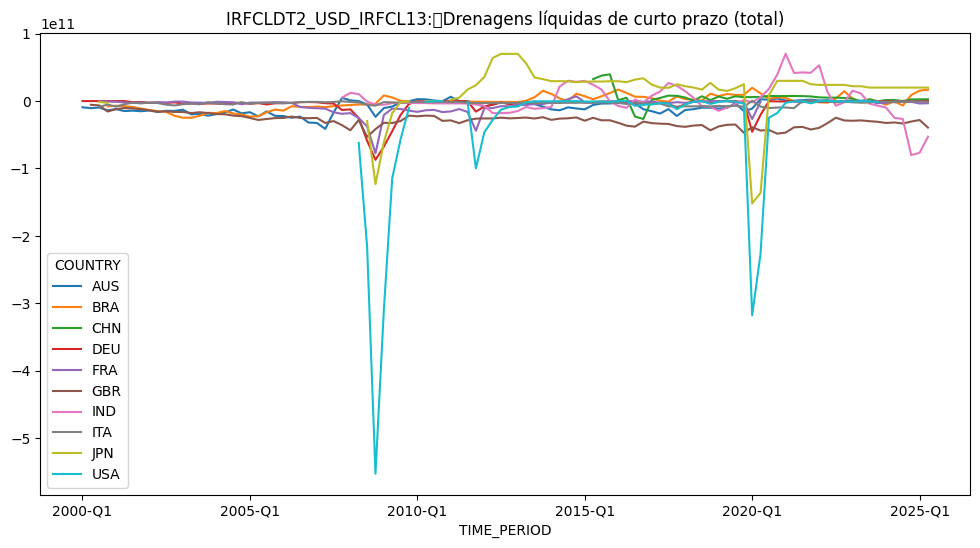

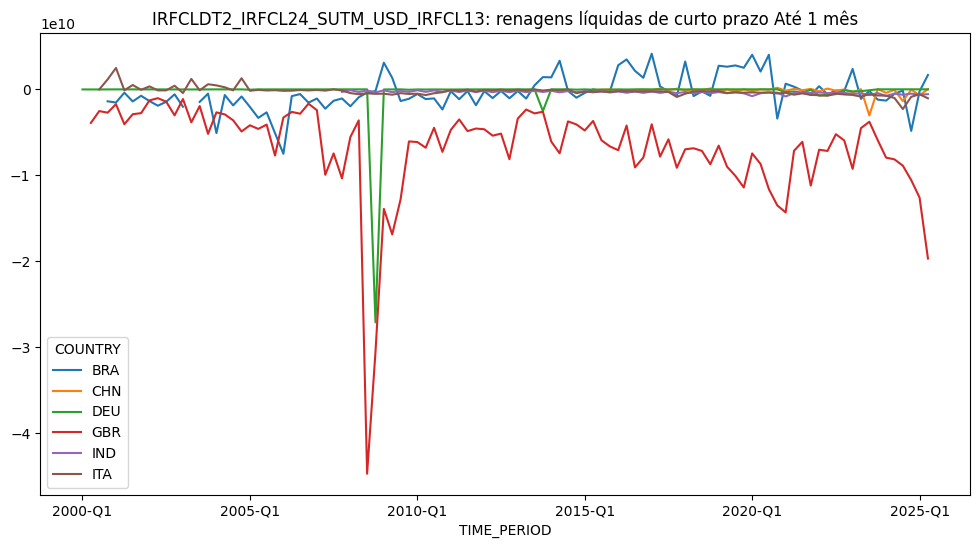

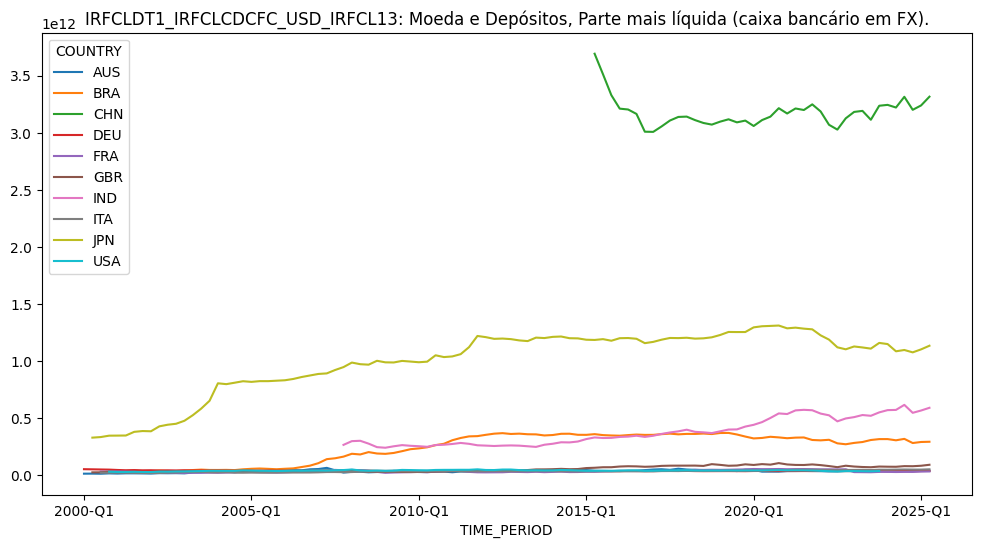

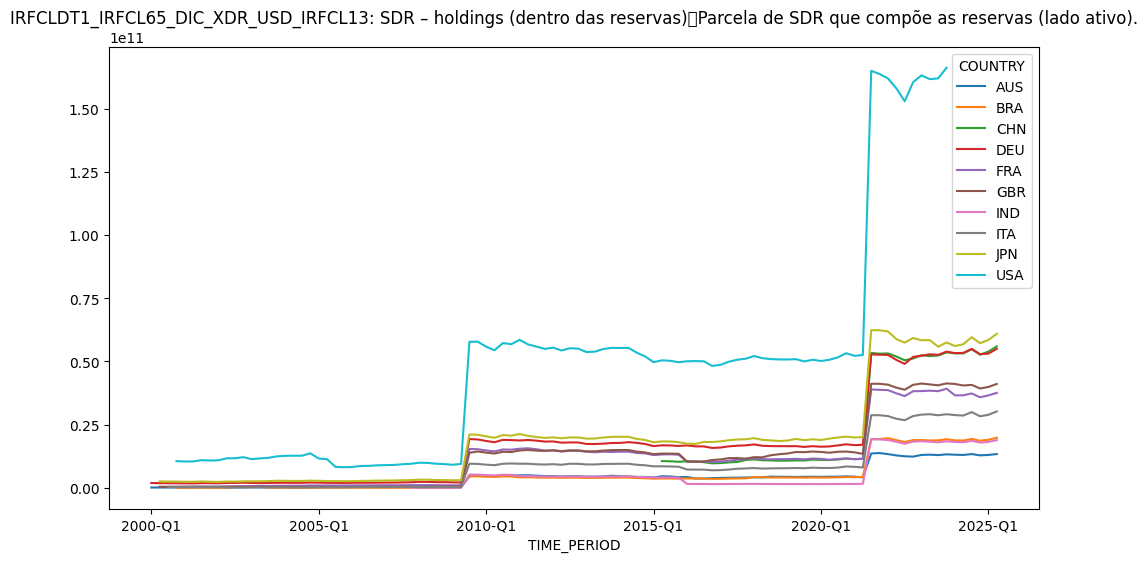

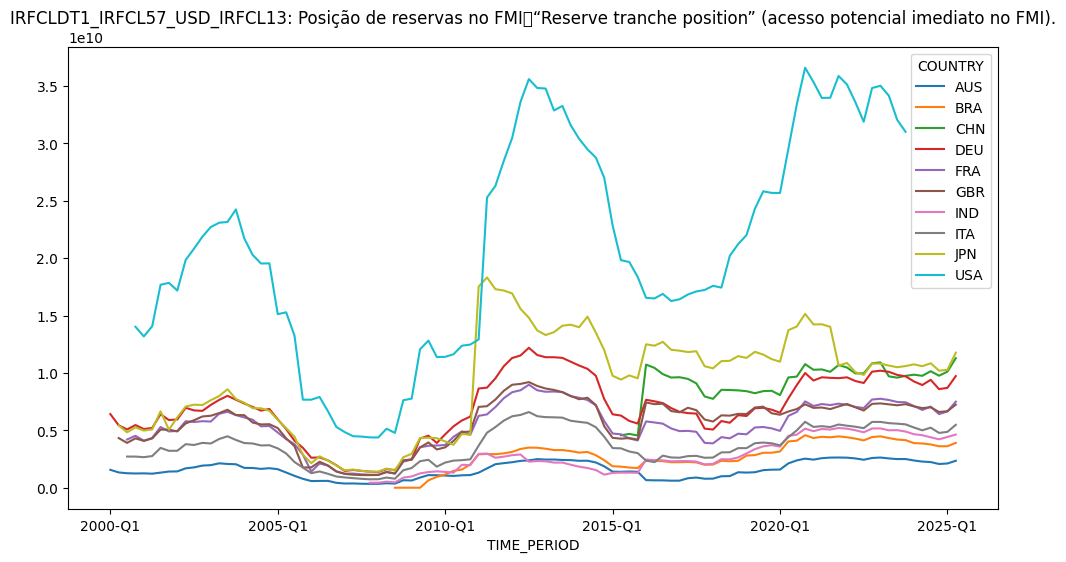

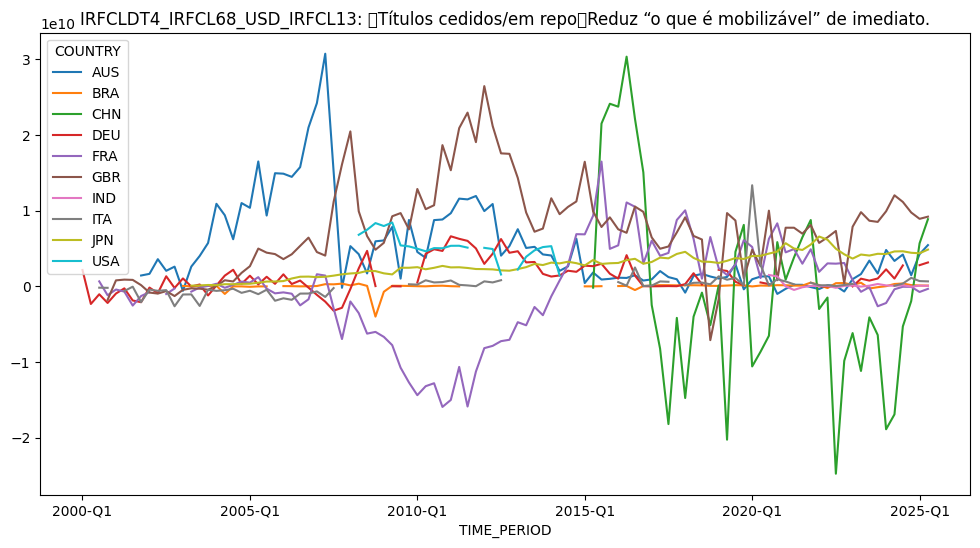

In [52]:
for indicador_sign in indicadores:
    indicador = indicador_sign.split(':')[0]
    df_filtrado = irfcl_null[(irfcl_null['INDICATOR']== indicador) & (irfcl_null['COUNTRY'].isin(paises))]

    # display(teste['TIME_PERIOD'])
    pivot_filtrado = df_filtrado.pivot_table(
        values='value',
        index='TIME_PERIOD',
        columns='COUNTRY',
    )

    pivot_filtrado.plot(figsize=(12,6), title=indicador_sign)



## 1) **Reservas oficiais (total)** — `IRFCLDT1_IRFCL65_USD_IRFCL13`

**O que o gráfico mostra**

* **CHN** no topo com folga. Pico ~2014–2015, queda 2015–2016 (defesa do RMB), depois estabilização/reacúmulo gradual até 2025.
* **JPN** é o segundo maior, trajetória ascendente até ~2020, depois acomodação/leve serrilha.
* **IND** com **tendência forte de acumulação** desde ~2017–2018; destaque positivo.
* **DEU/FRA/GBR/ITA** e **CAN/AUS/USA** em patamares bem menores (o que não é “ruim” por si só; moedas fortes e acesso a linhas reduzem a necessidade de estoques gigantes).


## 2) **Drenagens líquidas (total)** — `IRFCLDT2_USD_IRFCL13`

**O que o gráfico mostra**

* Séries oscilando ao redor de zero, com **mergulhos** (outflows projetados).
* **USA** tem mergulho **extremo** ~2008–2009 e outro ~2020Q1–Q2 (crises global/Covid).
* **JPN** exibe **picos positivos** (inflows) ~2010–2013 e ~2020–2021, sugerindo janelas de rolagem favoráveis.
* **GBR** mostra quedas mais largas em vários momentos (maior sensibilidade de funding em USD/GBP?).


## 3) **Drenagens ≤ 1 mês** — `IRFCLDT2_IRFCL24_SUTM_USD_IRFCL13`

**O que o gráfico mostra**

* **GBR** tem **sequência de outflows imediatos** (negativos), com **grande cavado ~2008–2009** e nova piora recente (2023–2025).
* **DEU** também com forte cavado ~2008–2009.
* **CAN** apresenta pequenas a moderadas ondas negativas; **CHN/ITA/IND** ficam perto de zero na maior parte do tempo (perfil menos “nervoso” no bucket de 1 mês).


## 4) **Moeda e Depósitos (Caixa)** — `IRFCLDT1_IRFCLCDCFC_USD_IRFCL13`

**O que o gráfico mostra**

* **CHN** e **JPN** têm **caixa elevado** (espelhando parte do nível de reservas).
* **IND** cresceu bastante o caixa desde ~2018–2019 (consistente com o aumento do estoque total).
* **FRA** também melhora caixa nos últimos anos.
* **USA/DEU/GBR/CAN/AUS/ITA** mantêm níveis modestos de caixa (normal para moedas hard/mercados profundos, mas ainda assim relevante).

## 5) **SDR holdings** — `IRFCLDT1_IRFCL65_DIC_XDR_USD_IRFCL13`

**O que o gráfico mostra**

* **Saltos marcantes ~2009–2010** e **~2021** (grandes alocações de SDR do FMI).
* **USA** tem patamar de SDR muito acima dos demais; **JPN** e **CHN** também se destacam no pós-2021.
* Todos os países sobem em 2021 (ampliação universal de “munição potencial”).


## 6) **Reserve Tranche Position (Tranche no FMI)** — `IRFCLDT1_IRFCL57_USD_IRFCL13`

**O que o gráfico mostra**

* **USA** muito acima, com ciclos e **picos ~2011–2014** e **~2021–2022**.
* **JPN** tem um **degrau alto** ~2010–2011 e pico ~2021; **CHN** sobe gradualmente após 2011.
* Europa (DEU/FRA/ITA/GBR) sobe após 2010, cai ~2016 e volta a subir ~2021.


## 7) **Títulos cedidos / em repo** — `IRFCLDT4_IRFCL68_USD_IRFCL13`

**O que o gráfico mostra**

* **CHN** exibe **alta volatilidade** recente, inclusive valores muito positivos (~2015–2016) e depois **sequência de valores negativos** (2018–2024).
* **GBR** tem **picos positivos** grandes ~2010–2016 (muita atividade de *securities lending*/repo).
* **AUS** tem pico grande no começo dos anos 2000.
* **ITA** ficou **claramente negativa ~2008–2012** (parte das reservas “presa”).
* **USA/DEU/FRA/JPN** variam em torno de zero/positivos modestos.


# Síntese por país

* **CHN**: Estoque enorme, **caixa alto**, SDR pós-2021 robusto; teve defesa do câmbio 2015–16; **repo volátil** recente 
* **JPN**: Estoque elevado, caixa alto, tranche/SDR fortes, episódios de drenagens grandes em 2020 mas com **inflows** em outros períodos
* **IND**: Trajetória de **acumulação** + caixa crescente + SDR pós-2021; **perfil saudável** nas métricas, mas cheque **D e D1M** nos choques 2020–2022.
* **USA**: Reservas pequenas (não é problema per se), **SDR e tranche** muito fortes; drenagens violentas em 2008/2020; **swap lines** e credibilidade compensam o estoque baixo.
* **GBR**: D1M **recorrentemente negativo** e **repo** alto em fases; exige atenção em **Cobertura ≤1M** e **R – Repo**.
* **DEU/FRA/ITA**: Estoques médios/baixos; **ITA** teve **repo negativo** longo (~2008–2012); convém usar **reservas ajustadas** e vigiar D1M.

